In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
data=pd.read_csv("nv.csv")
data.shape

(14, 5)

In [3]:
encode=LabelEncoder()

In [4]:
data['outlook']=encode.fit_transform(data.outlook)

In [5]:
data['temp']=encode.fit_transform(data.temp)

In [6]:
data['Humidity']=encode.fit_transform(data.Humidity)

In [7]:
data['Wind']=encode.fit_transform(data.Wind)

In [8]:
data['Play_Tennis']=encode.fit_transform(data.Play_Tennis)

In [9]:
data

,outlook,temp,Humidity,Wind,Play_Tennis
0,1,1,0,1,0
1,1,1,0,0,0
2,2,1,0,1,1
3,0,2,0,1,1
4,0,0,1,1,1
5,0,0,1,0,0
6,2,0,1,0,1
7,1,2,0,1,0
8,1,0,1,1,1
9,0,2,1,1,1


In [10]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [12]:
classifier=DecisionTreeClassifier(criterion = "entropy")

In [13]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
pred_y=classifier.predict(x)

In [15]:
pred_y

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [16]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play_Tennis, dtype: int32

In [17]:
accuracy_score(y,pred_y)

0.8571428571428571

In [18]:
confusion_matrix(y,pred_y)

array([[5, 0],
       [2, 7]], dtype=int64)

In [19]:
classifier.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
pred_y=classifier.predict(x_test)

In [21]:
pred_y

array([1, 1, 1])

In [22]:
y_test

8    1
6    1
4    1
Name: Play_Tennis, dtype: int32

In [23]:
accuracy_score(y_test,pred_y)

1.0

In [24]:
confusion_matrix(y_test,pred_y)

array([[3]], dtype=int64)

In [25]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [26]:
a=x_train.columns

In [27]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=a, filled=True,rounded=True)

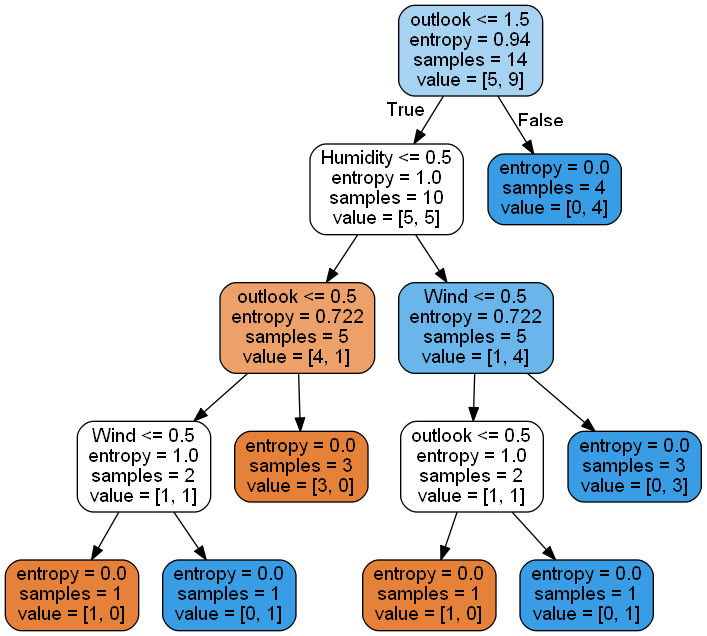

In [28]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())